In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
import numpy as np
import statistics as stat

In [3]:
# Loading the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



# About this Dataset¶

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns).
The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 categorical features (sex, smoker and region)

Target variable : expenses
Objective : Predicting the expenses based on the given features of a individual.

From the categorical features, to check whether the variables sex and smoker are predictor or not, assigning the numberical values to those variables.
For smoker: if yes: 1 and no: 0
For sex: if female: 1 and male: 0


In [9]:
df1 = df.copy()
df2 = df.copy()

# Converting binary categorical (nominal) attributes into the numerical¶

In [10]:
df1["smoker"] = df1["smoker"].replace({"yes":1,"no":0})
df1["sex"] = df1["sex"].replace({"female":1,"male":0})
df2["smoker"] = df2["smoker"].replace({"yes":1,"no":0})
df2["sex"] = df2["sex"].replace({"female":1,"male":0})

# Removing the non-binary attributes¶


In [12]:
df2.pop('region').values
df2.pop('charges').values

KeyError: 'region'

In [13]:
df2.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [14]:
df2.pop('charges').values

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [16]:
df2.dtypes #checking all the values are numerical 

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
dtype: object

# Data visualizations
Scatter plots of each Independent variable vs the dependent variable

Regression line through the plots

In [17]:
def regression_line(x,y):
    
    m = (sum(x*y) - (sum(x)*sum(y)/len(x)))/(sum(x*x) - (sum(x)*sum(x)/len(x)))
    constant = stat.mean(y) - m*stat.mean(x)
    print(f'linear regression line: Slope = {m:.2f}, Constant = {constant:.2f}')
    
    plt.plot(x, y, 'o')
    reg_line = [(m * i) + constant for i in x]
    plt.plot(x, reg_line)
    plt.show()

linear regression line: Slope = 257.72, Constant = 3165.89


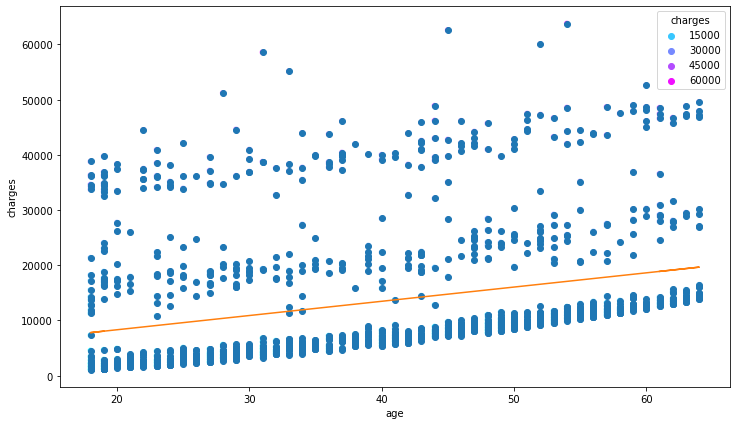

linear regression line: Slope = -1387.17, Constant = 13956.75


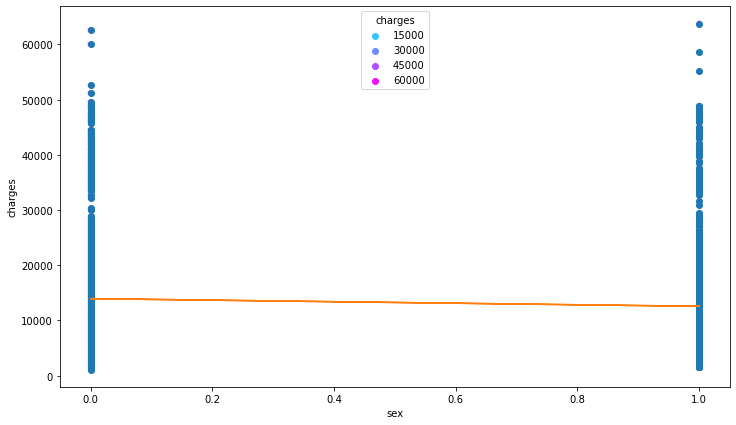

linear regression line: Slope = 393.87, Constant = 1192.94


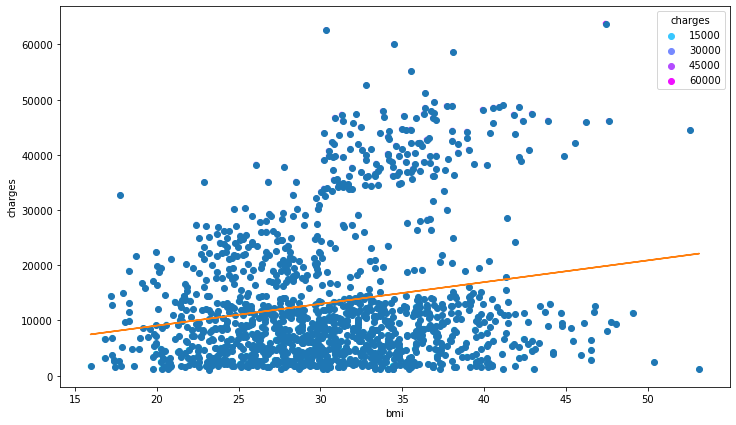

linear regression line: Slope = 683.09, Constant = 12522.50


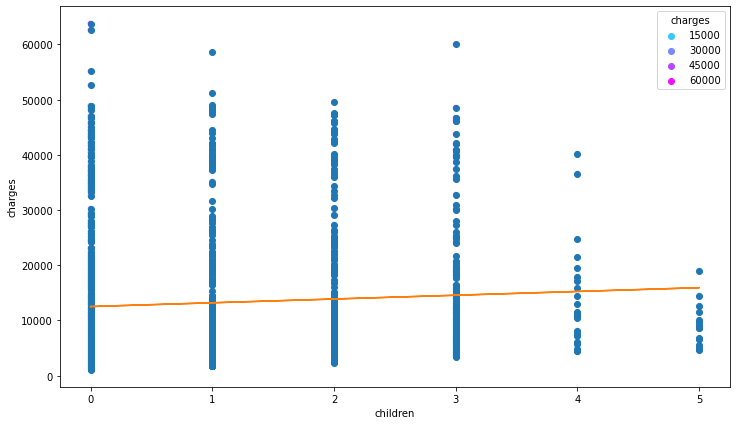

linear regression line: Slope = 23615.96, Constant = 8434.27


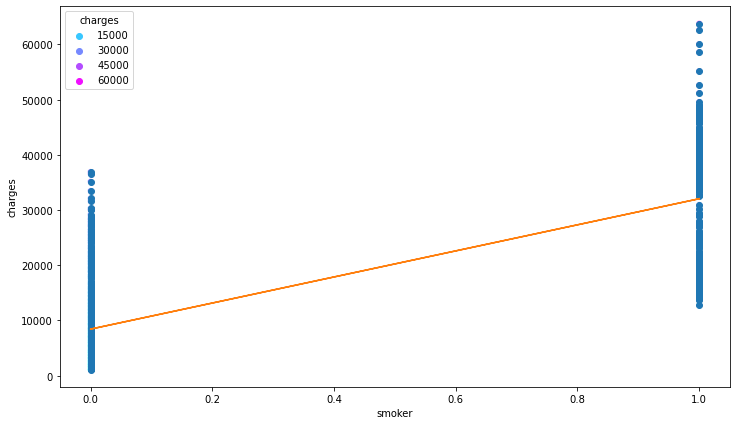

In [19]:
for i in df2.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df1, x=i, y='charges',hue='charges',palette='cool', legend=True)
    regression_line(df2[i], df1['charges'])

# Observations:

From the above scatter plots, can observe the following
1. For age column, can see linear relationship as by increasing age, the expenses are also increasing.
2. For sex column, can see little increase in male are relatively more spending than female. 
3. For smoker column, can see the individuals who smokes are spending more than individuals who doesn't smoke. 
4. The other columns, children, bmi doesnt have much significant impact on the target variable. 
5. Among all the other features, smoker is showing strong correlation with the target variable- expenses. 

In [22]:
# scatter plots of each independent variable vs dependent checking with smoker feature

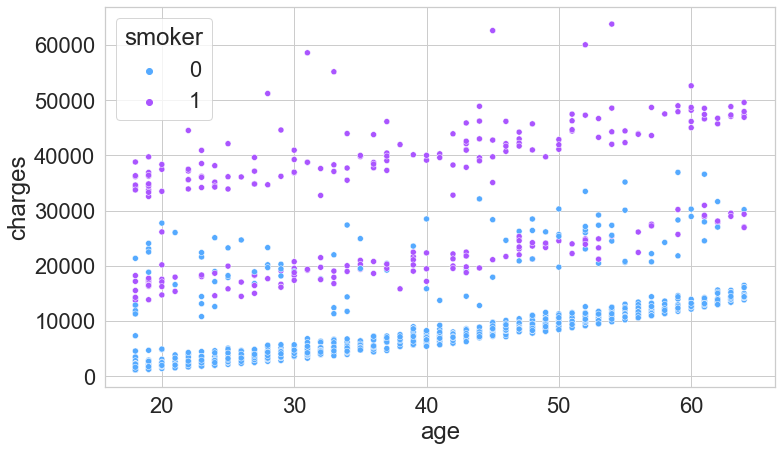

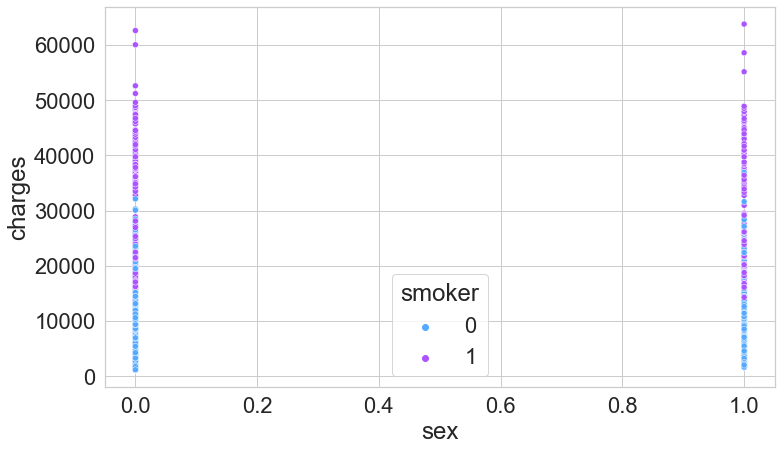

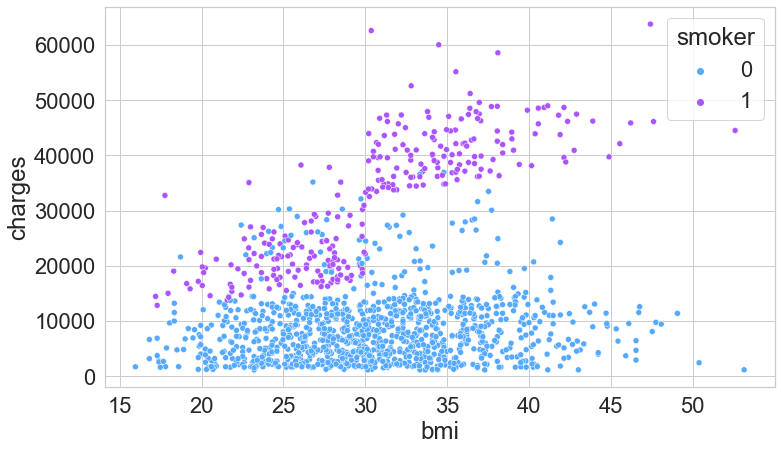

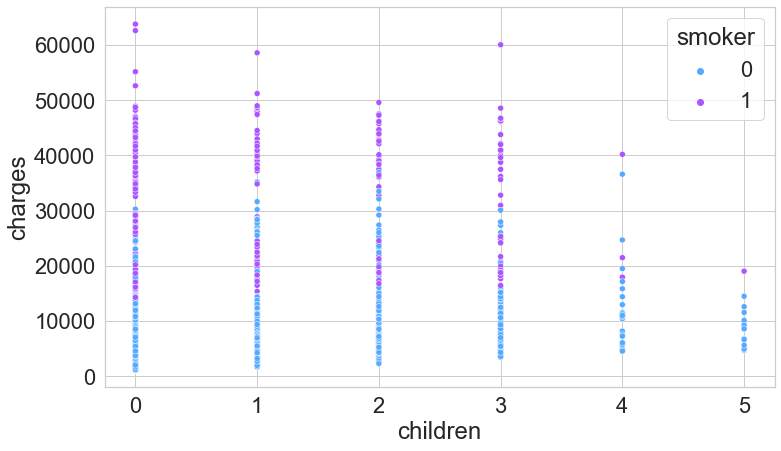

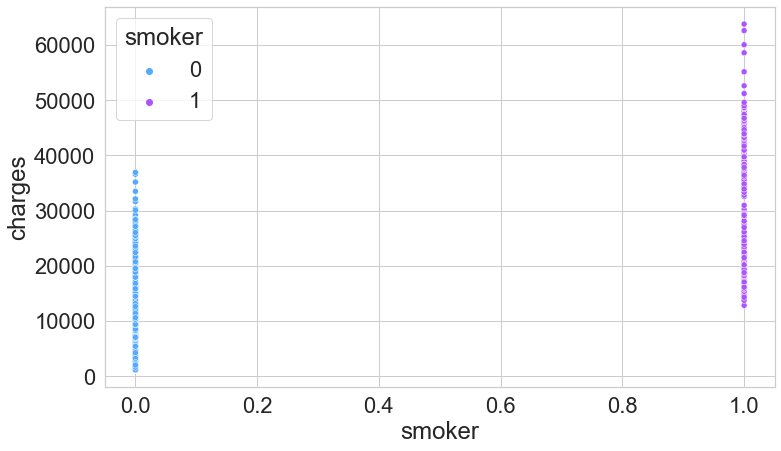

In [24]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

for i in df2.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df1, x=i, y='charges',hue='smoker',palette='cool', legend=True)

# Observations:

From the above plots, can see individuals who smokes are relatively spending more than the individuals who 
doesn't smoke in all the other plots. 

Therefore, smoker feature is a strong predictor with the target variable. 

# Spliting the data for training and testing¶


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df2, df1['charges'], random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (1003, 5)
Shape of testing  set = (335, 5)


# Train the model¶

In [26]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(df2.columns):
    print(f'{name:}: {linear_regression.coef_[i]:20.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

age: 263.08197344102336501237
sex: 263.32802026982278675860
bmi: 336.23811185197934037205
children: 551.85359618783206769876
smoker: 23526.91953255241605802439

y-intercept: -12875.17355618228066305164


# Test the model¶


In [27]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.8
     correlation coefficient = 0.9


# Visualize the expected vs. predicted values¶


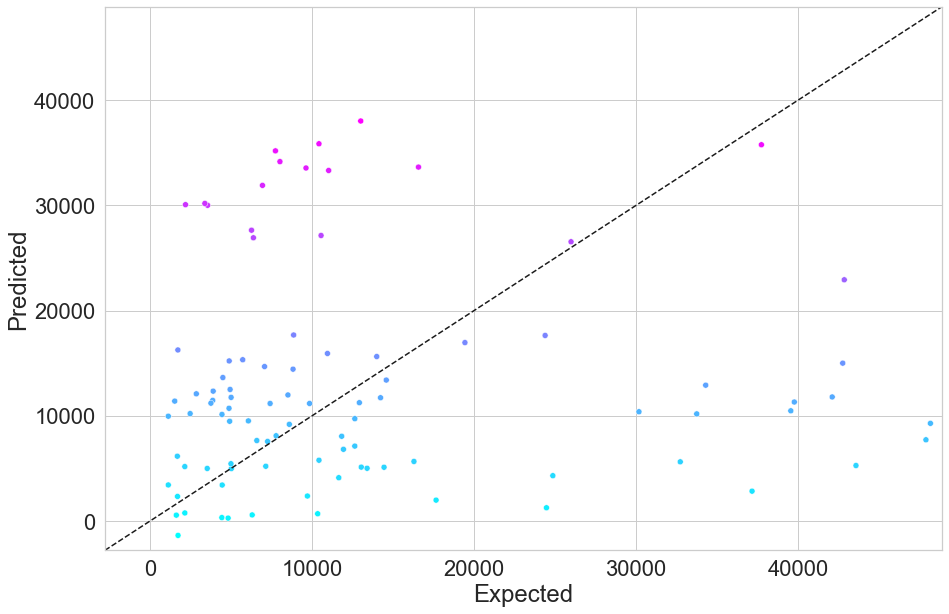

In [28]:
df_test = pd.DataFrame()

df_test['Expected']  = pd.Series(expected)
df_test['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df_test, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [29]:
df_test

,Expected,Predicted
1313,36397.57600,NaN
1254,4415.15880,NaN
372,7639.41745,NaN
937,8965.79575,NaN
484,9563.02900,NaN
...,...,...
369,3481.86800,NaN
170,13405.39030,5020.661664
154,7077.18940,14687.498313
212,3537.70300,5004.844594


# Summary:

We can see the strong correlation coefficient - 0.9 and coefficient of determination - 0.8 from the model, it shows the strong linear relationship between the independent and dependent variables.

smoker feature plays a significant role and most influenced attribute in predicting the expenses, i.e., if the individual smokes there is increase in the expenses comparitively with the individuals who doesn't smoke.

The other columns, children, bmi doesnt have much significant impact on the target variable.

However, in the plot can see significant variance of predicted from expected values.